### Import Pakages

In [209]:
import requests
import missingno as msno
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
import seaborn as sns
import scipy
from scipy import stats
cf.go_offline()
import heapq

import sys
import numpy as np
import pandas as pd
import math
from pandas import Series,DataFrame

import warnings
import sklearn.tree
import sklearn.metrics

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
sns.set(style="white", color_codes=True)
%matplotlib inline
plt.style.use('seaborn') # pretty matplotlib plots

### Import Dataset

In [210]:
def read_data_csv(filename):
    data = pd.read_csv(filename)
    return data
   

In [211]:
#Input path of file
filename = '/Users/mac/Desktop/SummerProject/WorksenseProject/FakeData/FakeData_update.csv'

In [212]:
simul_data = read_data_csv(filename)
simul_data 

,Unnamed: 0,Gender,Race,Sexual orientation,Age,Ave_salary
0,NaN,Male,White,Heterosexual,16-19,1721.21
1,NaN,Male,White,Heterosexual,16-19,1380.24
2,NaN,Male,White,Heterosexual,16-19,1524.88
3,NaN,Male,White,Heterosexual,16-19,1840.42
4,NaN,Male,White,Heterosexual,16-19,1747.09
...,...,...,...,...,...,...
1070,NaN,Transgender,White,Homosexual,35-44,698.25
1071,NaN,Transgender,White,Heterosexual,45-54,771.75
1072,NaN,Transgender,Black,Heterosexual,25-34,589.00
1073,NaN,Transgender,Latino,Heterosexual,45-54,597.00


In [213]:
simul_data.drop('Unnamed: 0',axis = 1,inplace=True)

In [214]:
simul_data

,Gender,Race,Sexual orientation,Age,Ave_salary
0,Male,White,Heterosexual,16-19,1721.21
1,Male,White,Heterosexual,16-19,1380.24
2,Male,White,Heterosexual,16-19,1524.88
3,Male,White,Heterosexual,16-19,1840.42
4,Male,White,Heterosexual,16-19,1747.09
...,...,...,...,...,...
1070,Transgender,White,Homosexual,35-44,698.25
1071,Transgender,White,Heterosexual,45-54,771.75
1072,Transgender,Black,Heterosexual,25-34,589.00
1073,Transgender,Latino,Heterosexual,45-54,597.00


### Data Digitize

In [215]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
encoder=LabelEncoder()
#location_new=encoder.fit_transform(ama_data_arr[:,1])
onehot = OneHotEncoder()
#location_1hot=onehot.fit_transform(location_new.reshape(-1,1))

In [216]:
#replace age region by middle
mid_agelist = []
for age in simul_data['Age']:
    if age == '16-19': 
        mid_age = 17
    elif age == '20-24':
        mid_age = 21
    elif age == '25-34':
        mid_age = 30
    elif age == '35-44':
        mid_age = 40
    elif age == '45-54':
        mid_age = 50
    elif age == '55-64':
        mid_age = 60
    else: mid_age = 65
    
    mid_agelist.append(mid_age)

In [217]:
np.shape(mid_agelist)

(1075,)

In [218]:
def age_num(ave_df):
    mid_age_list = []
    #print(ave_df)
    for age in ave_df['Age']:
        if age == '16-19': 
            mid_age = 17
        elif age == '20-24':
            mid_age = 21
        elif age == '25-34':
            mid_age = 30
        elif age == '35-44':
            mid_age = 40
        elif age == '45-54':
            mid_age = 50
        elif age == '55-64':
            mid_age = 60
        else: mid_age = 65
    
        mid_age_list.append(mid_age)
    #print(mid_age_list)
    mid_age_list = np.array(mid_age_list)
    mid_age_list = mid_age_list.reshape(-1,1)
    return mid_age_list

In [219]:
midage = age_num(simul_data)
midage

array([[17],
       [17],
       [17],
       ...,
       [30],
       [50],
       [30]])

#### Set inputs and outputs

In [220]:
Y = simul_data['Ave_salary'].copy()
Y = np.array(Y)
Y

array([1721.21, 1380.24, 1524.88, ...,  589.  ,  597.  ,  850.  ])

In [221]:
X = mid_agelist.copy()
X = np.array(X)

In [222]:
Male_avg = simul_data.loc[simul_data['Gender']=='Male']
Male_avg

,Gender,Race,Sexual orientation,Age,Ave_salary
0,Male,White,Heterosexual,16-19,1721.21
1,Male,White,Heterosexual,16-19,1380.24
2,Male,White,Heterosexual,16-19,1524.88
3,Male,White,Heterosexual,16-19,1840.42
4,Male,White,Heterosexual,16-19,1747.09
...,...,...,...,...,...
516,Male,Asian,Heterosexual,>64,1071.60
517,Male,Asian,Heterosexual,>64,1000.03
518,Male,Asian,Homosexual,20-24,1084.24
519,Male,Asian,Homosexual,25-34,1198.37


In [223]:
female_avg = simul_data.loc[simul_data['Gender']!='Male']
female_avg = female_avg.loc[female_avg['Gender']!='Transgender']
female_avg

,Gender,Race,Sexual orientation,Age,Ave_salary
521,Female,White,Heterosexual,16-19,1379.51
522,Female,White,Heterosexual,16-19,1038.54
523,Female,White,Heterosexual,16-19,1183.18
524,Female,White,Heterosexual,16-19,1498.72
525,Female,White,Heterosexual,16-19,1405.39
...,...,...,...,...,...
1065,Female,Asian,Heterosexual,55-64,1073.88
1066,Female,Asian,Heterosexual,>64,1199.95
1067,Female,Asian,Homosexual,25-34,882.27
1068,Female,Asian,Homosexual,35-44,928.70


In [224]:
trans_avg = simul_data.loc[simul_data['Gender']=='Transgender']
trans_avg

,Gender,Race,Sexual orientation,Age,Ave_salary
1070,Transgender,White,Homosexual,35-44,698.25
1071,Transgender,White,Heterosexual,45-54,771.75
1072,Transgender,Black,Heterosexual,25-34,589.00
1073,Transgender,Latino,Heterosexual,45-54,597.00
1074,Transgender,Asian,Heterosexual,25-34,850.00


### Build Regression Tools

In [225]:
def plot_predictions(x, y, polynomials=list(), prediction_list=list(), error_list=list()):
    length = len(prediction_list)
    grid_size = int(math.sqrt(length))
    if not (length == len(polynomials) and length == len(error_list)):
        raise ValueError("Input lists must be of same length")
    if not length == (grid_size * grid_size):
        raise ValueError("Need a square number of list items (%d given)" % (length))
    
    fig, axs = plt.subplots(grid_size, grid_size, figsize =(14,14), sharey=True)
    for subplot_id, prediction in enumerate(prediction_list):
        # order data for display
        data_frame = pd.DataFrame(data=[x[:, 0], prediction]).T
        data_frame = data_frame.sort_values(by=0)
        x_sorted = data_frame.iloc[:, :-1].values
        prediction_sorted = data_frame.iloc[:, 1].values

        ax = axs.flat[subplot_id]
        ax.set_title('degree = %d; MSE = %.3f' % (polynomials[subplot_id], error_list[subplot_id]))
        ax.plot(x, y, 'r.')
        ax.plot(x_sorted, prediction_sorted, color='blue')
        
    plt.show()

In [226]:
def test_polynomials(x, y, polynomials=list()):
    
    prediction_list = list()
    error_list = list()
    
    for d in polynomials:
        poly = PolynomialFeatures(degree=d) 
        x_T = poly.fit_transform(x)
        linearRegression = LinearRegression()
        linearRegression.fit(x_T, y)
        yPredict = linearRegression.predict(x_T)
        #print(yPredict[i-1])
        error = mean_squared_error(y, yPredict) / max(y)
        #print(error[i-1])
        prediction_list.append(yPredict)
        error_list.append(error)

        
    #return yPredict,error
    return prediction_list, error_list


### Give an overall view -- linear regression(degrees 1 to 4) for all data

In [227]:
X = X.reshape(-1, 1)

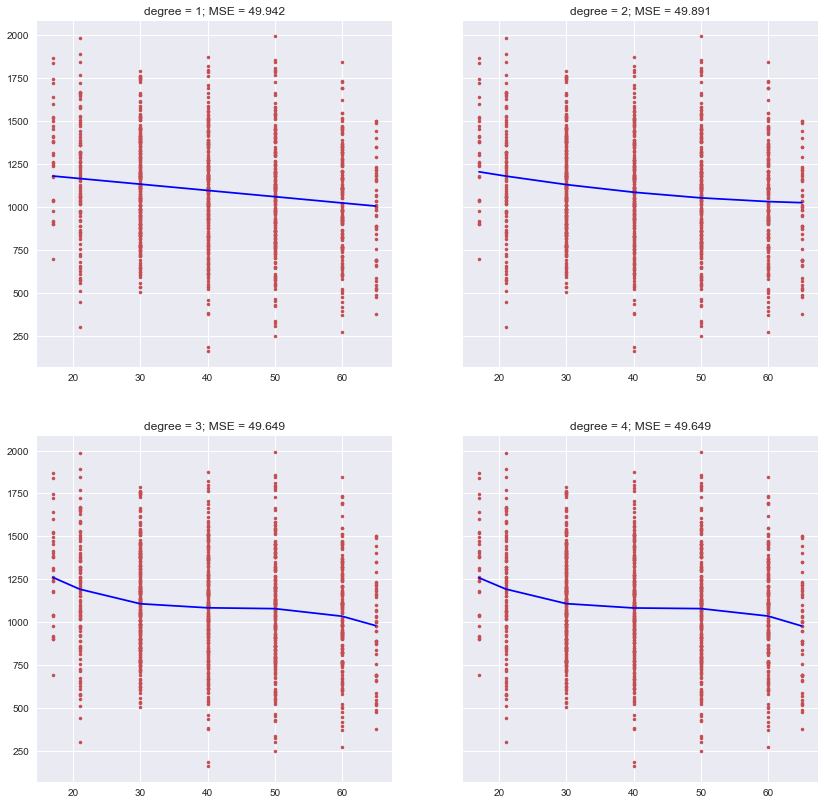

In [228]:
degrees = (1,2,3,4)
predict_of_y,error_of_y = test_polynomials(X, Y, degrees)
plot_predictions(X, Y, list(degrees), list(predict_of_y), list(error_of_y))

### Linear regression tools

In [229]:
def linearRegression(x, y, degree, department):
    #create linear regression model for all workers
    
    poly = PolynomialFeatures(degree) 
    x_T = poly.fit_transform(x)
    linearRegression = LinearRegression()
    linearRegression.fit(x_T, y)
    yPredict = linearRegression.predict(x_T)
    #print(yPredict[i-1])
    error = mean_squared_error(y, yPredict) / max(y)
    #print(error[i-1])
    prediction = yPredict
    error = error
    
    plt.title('degree = %d; MSE = %.3f' % (degree, error))
    plt.plot(x, y, '.')
    plt.plot(x,  yPredict,label = '%s'%department)
    plt.legend()
    
    return poly, prediction, error

In [230]:
def linearRegression_all(x, y, degree):
    poly = PolynomialFeatures(degree) 
    x_T = poly.fit_transform(x)
    linearRegression = LinearRegression()
    linearRegression.fit(x_T, y)
    yPredict = linearRegression.predict(x_T)
    #print(yPredict[i-1])
    error = mean_squared_error(y, yPredict) / max(y)
    #print(error[i-1])
    prediction = yPredict
    error = error
    
    #plt.title('degree = %d; MSE = %.3f' % (degree, error))
    #plt.plot(x, y, '.')
    plt.plot(x,  yPredict, 'r',label = 'All-Linear',lw = 5)
    plt.legend()
    
    return poly, prediction, error

In [231]:
ave_age = simul_data.groupby('Age',as_index = False)['Ave_salary'].mean()
ave_age

,Age,Ave_salary
0,16-19,1310.412727
1,20-24,1158.617000
2,25-34,1116.713750
3,35-44,1082.868077
4,45-54,1068.272825
5,55-64,1049.662514
6,>64,955.876481


In [232]:
mid_agelist = []
for age in ave_age['Age']:
    if age == '16-19': 
        mid_age = 17
    elif age == '20-24':
        mid_age = 21
    elif age == '25-34':
        mid_age = 30
    elif age == '35-44':
        mid_age = 40
    elif age == '45-54':
        mid_age = 50
    elif age == '55-64':
        mid_age = 60
    else: mid_age = 65
    
    mid_agelist.append(mid_age)

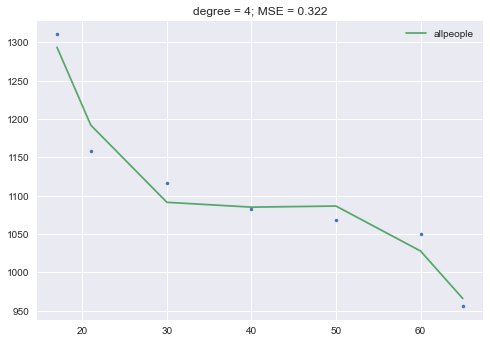

In [233]:
x = np.array(mid_agelist)
x = x.reshape(-1,1)
y = np.array(ave_age['Ave_salary'].copy())
model, prediction, error = linearRegression(x, y, 4, 'allpeople')

### Divide by Gender and related linear regression tool

In [234]:
def genderRegression(degree, dataframe):
    
    men = dataframe.loc[dataframe['Gender']=='Male']
    men_ave = men.groupby('Age',as_index = False)['Ave_salary'].mean()
    
    trans = dataframe.loc[dataframe['Gender']=='Transgender']
    trans_ave = trans.groupby('Age',as_index = False)['Ave_salary'].mean()
    
    women = dataframe.loc[dataframe['Gender']!='Male']
    women = women.loc[women['Gender']!='Transgender']
    women_ave = women.groupby('Age',as_index = False)['Ave_salary'].mean()
    
    #all_data = dataframe.groupby('Age',as_index = False)['Ave_salary'].mean()

    
    x_men = age_num(men_ave)
    x_women = age_num(women_ave)
    x_trans = age_num(trans_ave)
    
    y_men = np.array(men_ave['Ave_salary'].copy())
    y_women = np.array(women_ave['Ave_salary'].copy())
    y_trans = np.array(trans_ave['Ave_salary'].copy())
    
    model_men, pre_men, error_men = linearRegression(x_men, y_men, degree, 'men')
    model_women, pre_women, error_women = linearRegression(x_women, y_women, degree, 'women')
    model_trans, pre_trans, error_trans = linearRegression(x_trans, y_trans, degree, 'transgender')
    
    x_all = age_num(dataframe)
    y_all = np.array(dataframe['Ave_salary'].copy())
    model_all, pre_all, error_all = linearRegression_all(x_all, y_all, 1)
    
    #print(y_men)
    #print(y_women)
    #print(y_trans)
    
    return model_men, pre_men, error_men, model_women, pre_women, error_women, model_trans, pre_trans, error_trans
    #create polynomial regression for each category (male, female, transgender, other)
    #plot all of these lines on same graph
    #also plot scatter plot of all data points on same graph
    

(PolynomialFeatures(degree=3, include_bias=True, interaction_only=False,
                    order='C'),
 array([1463.12151076, 1358.49696531, 1244.82206207, 1240.25025236,
        1263.01845334, 1208.85011887, 1120.32833018]),
 0.3909307112740063,
 PolynomialFeatures(degree=3, include_bias=True, interaction_only=False,
                    order='C'),
 array([1118.99906471, 1050.38276441,  959.99814381,  926.88555981,
         916.02717621,  877.14355726,  831.47996086]),
 0.3271056524404037,
 PolynomialFeatures(degree=3, include_bias=True, interaction_only=False,
                    order='C'),
 array([719.5  , 698.25 , 684.375]),
 0.0)

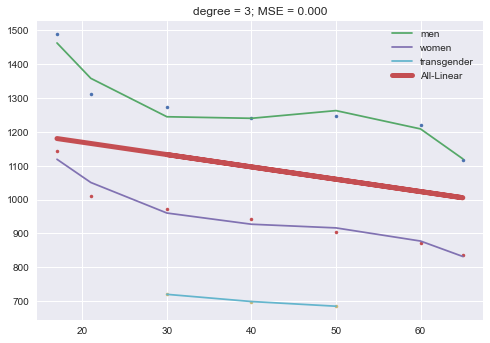

In [235]:
genderRegression(3, simul_data)

### Divide by Race and related linear regression tool

In [236]:
def raceRegression(degree, dataframe):
    
    white = dataframe.loc[dataframe['Race']=='White']
    white_ave = white.groupby('Age',as_index = False)['Ave_salary'].mean()
    
    black = dataframe.loc[dataframe['Race']=='Black']
    black_ave = black.groupby('Age',as_index = False)['Ave_salary'].mean()
    
    asian = dataframe.loc[dataframe['Race']=='Asian']
    asian_ave = asian.groupby('Age',as_index = False)['Ave_salary'].mean()
    
    latino = dataframe.loc[dataframe['Race']=='Latino']
    latino_ave = latino.groupby('Age',as_index = False)['Ave_salary'].mean()
    
    x_white = age_num(white_ave)
    x_black = age_num(black_ave)
    x_asian = age_num(asian_ave)
    x_latino = age_num(latino_ave)
    
    y_white = np.array(white_ave['Ave_salary'].copy())
    y_black = np.array(black_ave['Ave_salary'].copy())
    y_asian = np.array(asian_ave['Ave_salary'].copy())
    y_latino = np.array(latino_ave['Ave_salary'].copy())
    
    model_white, pre_white, error_white = linearRegression(x_white, y_white, degree, 'white')
    model_black, pre_black, error_black = linearRegression(x_black, y_black, degree, 'black')
    model_asian, pre_asian, error_asian = linearRegression(x_asian, y_asian, degree, 'asian')
    model_latino, pre_latino, error_latino = linearRegression(x_latino, y_latino, degree, 'latino')
    
    x_all = age_num(dataframe)
    y_all = np.array(dataframe['Ave_salary'].copy())
    model_all, pre_all, error_all = linearRegression_all(x_all, y_all, 1)
    
    return model_white, pre_white, error_white, model_black, pre_black, error_black, model_asian, pre_asian, error_asian, model_latino, pre_latino, error_latino
            
    #create polynomial regression for each category (white, black, asian, hispanic/latino)
    #plot all of these lines on same graph
    #also plot scatter plot of all data points on same graph

(PolynomialFeatures(degree=4, include_bias=True, interaction_only=False,
                    order='C'),
 array([1277.84050302, 1170.09875573, 1097.14887659, 1116.53349733,
        1105.51447023, 1040.42048765, 1013.05346774]),
 0.7171546207669472,
 PolynomialFeatures(degree=4, include_bias=True, interaction_only=False,
                    order='C'),
 array([1188.86085808, 1107.10466797,  945.11746798,  869.71020501,
         880.04511991,  809.36861122,  651.83638028]),
 1.5456405428566646,
 PolynomialFeatures(degree=4, include_bias=True, interaction_only=False,
                    order='C'),
 array([1650.59328457, 1413.31407305, 1210.60676263, 1186.17931515,
        1140.32320205, 1094.41720234, 1151.66184203]),
 3.885620751498821,
 PolynomialFeatures(degree=4, include_bias=True, interaction_only=False,
                    order='C'),
 array([1199.06016853, 1127.77031608,  963.13955382,  876.35577402,
         900.0953679 ,  888.26198726,  779.67268088]),
 0.0016284760132260147)

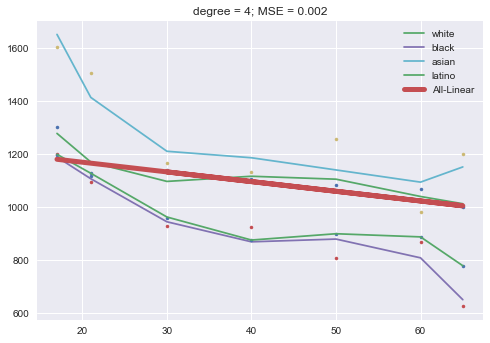

In [237]:
raceRegression(4, simul_data)

### Divide by Sex-Orientation and related linear regression tool

In [238]:
def sexOrientRegression(degree, dataframe):
    
    hetero = dataframe.loc[dataframe['Sexual orientation']=='Heterosexual']
    hetero_ave = hetero.groupby('Age',as_index = False)['Ave_salary'].mean()
    
    homo = dataframe.loc[dataframe['Sexual orientation']=='Homosexual']
    homo_ave = homo.groupby('Age',as_index = False)['Ave_salary'].mean()
    
    bisex = dataframe.loc[dataframe['Sexual orientation']!='Heterosexual']
    bisex = bisex.loc[dataframe['Sexual orientation']!='Homosexual']
    bisex_ave = bisex.groupby('Age',as_index = False)['Ave_salary'].mean()
    
    x_hetero = age_num(hetero_ave)
    x_homo = age_num(homo_ave)
    x_bisex = age_num(bisex_ave)
    
    #print(x_bisex)
    
    y_hetero = np.array(hetero_ave['Ave_salary'].copy())
    y_homo = np.array(homo_ave['Ave_salary'].copy())
    y_bisex = np.array(bisex_ave['Ave_salary'].copy())
    
    model_hetero, pre_hetero, error_hetero = linearRegression(x_hetero, y_hetero, degree, 'Heterosexual')
    model_homo, pre_homo, error_homo = linearRegression(x_homo, y_homo, degree, 'Homosexual')
    model_bisex, pre_bisex, error_bisex = linearRegression(x_bisex, y_bisex, degree, 'Bisexual')
    
    x_all = age_num(dataframe)
    y_all = np.array(dataframe['Ave_salary'].copy())
    model_all, pre_all, error_all = linearRegression_all(x_all, y_all, 1)
    
    return model_hetero, pre_hetero, error_hetero, model_homo, pre_homo, error_homo, model_bisex, pre_bisex, error_bisex
    
    #create polynomial regression for each category (gay, straight, bi, other)
    #plot all of these lines on same graph
    #also plot scatter plot of all data points on same graph

(PolynomialFeatures(degree=4, include_bias=True, interaction_only=False,
                    order='C'),
 array([1292.81544119, 1195.02559023, 1097.15282437, 1088.50444275,
        1085.74982309, 1023.82965789,  960.96492366]),
 0.3472877130991281,
 PolynomialFeatures(degree=4, include_bias=True, interaction_only=False,
                    order='C'),
 array([1130.83402823, 1085.78555356, 1095.72779122, 1432.60027157,
        1538.82095219, 1098.29265323]),
 0.7290040379896188,
 PolynomialFeatures(degree=4, include_bias=True, interaction_only=False,
                    order='C'),
 array([897.68  , 864.6175, 759.46  , 713.26  ]),
 3.306057688900812e-24)

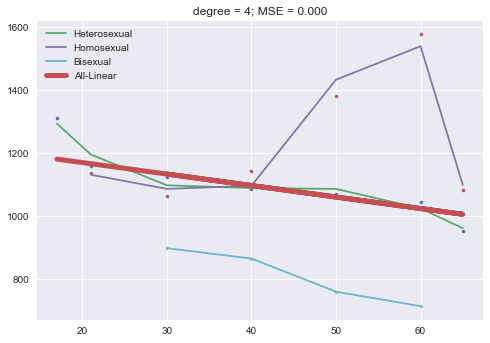

In [239]:
sexOrientRegression(4, simul_data)

### Outlier Detection Tool

Set outliers as everything higher than the top and lowers the bottom of the model boundary.  
The importance of outlier as based on how far the dot from the boundary.  


In [240]:
#pip install fbprophet
import fbprophet
import os
import altair as alt
alt.renderers.enable('notebook')
#print(os.listdir("../WorksenseProject"))
from IPython.display import HTML
from fbprophet import Prophet

In [241]:
#pip install altair
#pip install vega
simul_data

,Gender,Race,Sexual orientation,Age,Ave_salary
0,Male,White,Heterosexual,16-19,1721.21
1,Male,White,Heterosexual,16-19,1380.24
2,Male,White,Heterosexual,16-19,1524.88
3,Male,White,Heterosexual,16-19,1840.42
4,Male,White,Heterosexual,16-19,1747.09
...,...,...,...,...,...
1070,Transgender,White,Homosexual,35-44,698.25
1071,Transgender,White,Heterosexual,45-54,771.75
1072,Transgender,Black,Heterosexual,25-34,589.00
1073,Transgender,Latino,Heterosexual,45-54,597.00


Text(0, 0.5, 'Average Income(weekly)')

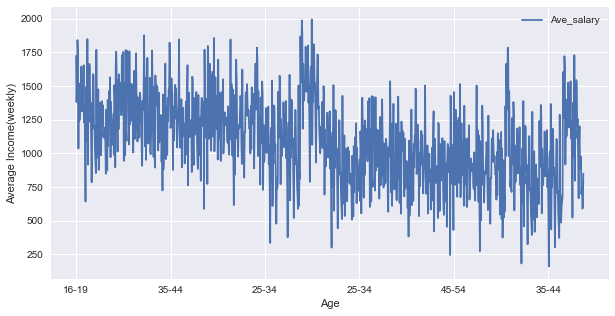

In [242]:
simul_data.plot(x = 'Age', y = 'Ave_salary',figsize=(10,5))
plt.xlabel('Age')
plt.ylabel('Average Income(weekly)')

In [243]:
Y = np.array(simul_data['Ave_salary'].copy())
median = np.median(Y)
mean = np.mean(Y)
std = np.std(Y)

In [244]:
mean

1090.1472372093024

In [245]:
median

1093.59

### Outlier detection according to standard deviation

In [246]:
def outlier_detection(dataframe):
    Y = np.array(dataframe['Ave_salary'].copy())
    median = np.median(Y)
    mean = np.mean(Y)
    std = np.std(Y)
    std2 = std*2
    std3 = std*3
    lower_std2 = mean - std2
    lower_std3 = mean - std3
    upper_std2 = mean + std2
    upper_std3 = mean + std3
    
    dataframe.plot(x = 'Age', y = 'Ave_salary',figsize=(15,9))
    #if need scatter, add " kind='scatter' " to above
    plt.axhline(median,color='r',lw=3,label='median')
    plt.axhline(mean,color='chocolate',lw=3,label='mean')
    plt.axhline(lower_std2,color='aqua',lw=2,label='2 times std')
    plt.axhline(upper_std2,color='aqua',lw=2)
    plt.axhline(lower_std3,color='fuchsia',lw=2,label='3 times std')
    plt.axhline(upper_std3,color='fuchsia',lw=2)


    plt.legend()
    plt.xlabel('Age')
    plt.ylabel('Average Income(weekly)')
    
    return mean, median, std

(1090.1472372093024, 1093.59, 319.51363159782727)

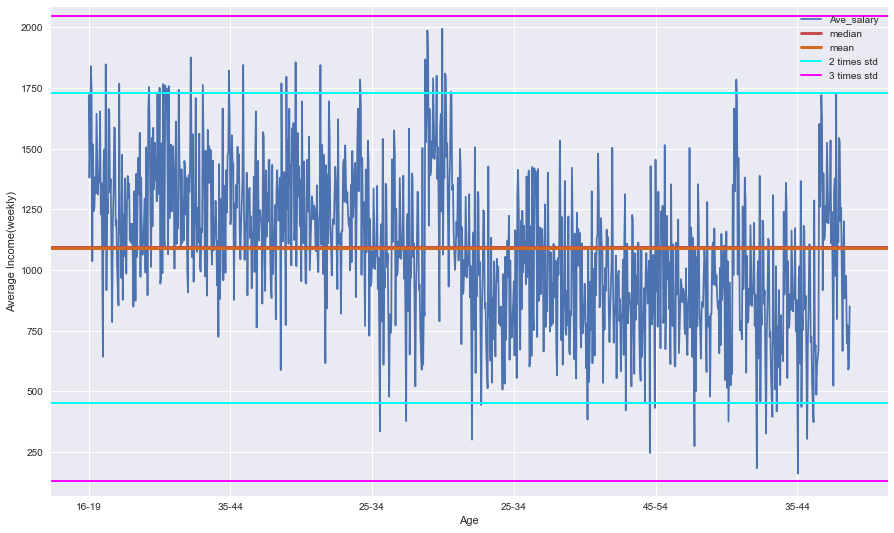

In [247]:
outlier_detection(simul_data)

### Select the most strange data

### Outlier detection tool by percentage

In [248]:
#set ratio of outliers
outlier_frac = 0.1

total_number = len(simul_data)
outlier_num = int(np.round(total_number * outlier_frac))

import heapq

In [249]:
outlier_num

108

In [250]:
Y = np.array(simul_data['Ave_salary'].copy())
outlier_num = int(np.round(len(simul_data) * outlier_frac))
center = np.median(Y)
dist_list = []
    
for i in range(0,len(simul_data)):
    dist = Y[i] - center
    dist = np.abs(dist)
    dist_list.append(dist)
       

In [251]:
max_num_index_list = map(dist_list.index, heapq.nlargest(outlier_num, dist_list))
max_num_index_list = list(max_num_index_list)
print(max_num_index_list)

[1001, 943, 499, 478, 792, 855, 479, 541, 1014, 144, 475, 956, 292, 411, 24, 218, 327, 3, 198, 1023, 903, 448, 503, 704, 491, 279, 504, 965, 486, 383, 383, 971, 272, 43, 758, 105, 161, 108, 113, 799, 85, 1006, 100, 4, 4, 554, 1022, 127, 511, 785, 948, 1055, 512, 97, 964, 0, 1034, 424, 877, 151, 1027, 339, 301, 384, 384, 857, 584, 969, 563, 901, 477, 766, 461, 189, 380, 380, 1051, 283, 481, 28, 906, 976, 587, 236, 16, 726, 84, 569, 1021, 109, 706, 29, 779, 11, 497, 898, 688, 745, 986, 604, 963, 1035, 661, 352, 487, 908, 770, 199]


In [252]:
for i in range(0,outlier_num):
    index = max_num_index_list[i]
    print(simul_data.loc[index])
    dist = Y[index] - np.mean(Y)
    #print(Y[index])
    print(dist)
    if Y[index] >= center:
        print('TOO HIGH')
    else:
        print('TOO LOW')
    print('------------------------------------')
    

Gender                     Female 
Race                        Latino
Sexual orientation    Heterosexual
Age                          35-44
Ave_salary                  160.35
Name: 1001, dtype: object
-929.7972372093024
TOO LOW
------------------------------------
Gender                     Female 
Race                         Black
Sexual orientation    Heterosexual
Age                          35-44
Ave_salary                  182.25
Name: 943, dtype: object
-907.8972372093024
TOO LOW
------------------------------------
Gender                        Male
Race                        Asian 
Sexual orientation    Heterosexual
Age                          45-54
Ave_salary                 1994.04
Name: 499, dtype: object
903.8927627906976
TOO HIGH
------------------------------------
Gender                        Male
Race                        Asian 
Sexual orientation    Heterosexual
Age                          20-24
Ave_salary                 1986.82
Name: 478, dtype: object
896.672

In [253]:
result

,199,199
Gender,Male,Male
Race,White,White
Sexual orientation,Heterosexual,Heterosexual
Age,35-44,35-44
Ave_salary,1614.33,1614.33


In [254]:
#outlier fraction ranges from 0 to 100
#center should be 'mean' or 'median'
def deviation_detection(dataframe, outlier_frac, center):
    outlier_frac = outlier_frac/100
    total_number = len(dataframe)
    
    Y = np.array(dataframe['Ave_salary'].copy())
    outlier_num = int(np.round(len(dataframe) * outlier_frac))
    if center is 'mean':
        center = np.mean(Y)
    if center is 'median':
        center = np.median(Y)
    
    dist_list = [] 
    for i in range(0,len(simul_data)):
        dist = Y[i] - center
        dist = np.abs(dist)
        dist_list.append(dist)
   
    max_num_index_list = map(dist_list.index, heapq.nlargest(outlier_num, dist_list))
    max_num_index_list = list(max_num_index_list)
    
    for i in range(0,outlier_num):
        index = max_num_index_list[i]
        print(dataframe.loc[index])
        dist = Y[index] - center
        #print(Y[index])
        print(dist)
        if Y[index] >= center:
            print('TOO HIGH')
        else:
            print('TOO LOW')
        print('------------------------------------')
    return max_num_index_list

In [258]:
max_num_index_list = deviation_detection(simul_data, 10, 'mean')

Gender                     Female 
Race                        Latino
Sexual orientation    Heterosexual
Age                          35-44
Ave_salary                  160.35
Name: 1001, dtype: object
-929.7972372093024
TOO LOW
------------------------------------
Gender                     Female 
Race                         Black
Sexual orientation    Heterosexual
Age                          35-44
Ave_salary                  182.25
Name: 943, dtype: object
-907.8972372093024
TOO LOW
------------------------------------
Gender                        Male
Race                        Asian 
Sexual orientation    Heterosexual
Age                          45-54
Ave_salary                 1994.04
Name: 499, dtype: object
903.8927627906976
TOO HIGH
------------------------------------
Gender                        Male
Race                        Asian 
Sexual orientation    Heterosexual
Age                          20-24
Ave_salary                 1986.82
Name: 478, dtype: object
896.672

In [256]:
print(max_num_index_list)

[1001, 943, 499, 478, 792, 855, 479, 541, 1014, 144, 475, 292, 956, 24, 411, 218, 327, 3, 198, 503, 1023, 903, 448, 491, 704, 279, 504, 486, 965, 383, 383, 272, 43, 105, 971, 161, 108, 758, 113, 85, 100, 799, 4, 4, 1006, 127, 554, 1022, 511, 1055, 512, 97, 785, 948, 0, 1034, 964, 151, 424, 877, 339, 1027, 301, 384, 384, 857, 584, 969, 477, 563, 901, 189, 380, 380, 283, 481, 28, 766, 461, 1051, 906, 976, 236, 16, 84, 109, 587, 29, 726, 569, 1021, 11, 497, 706, 779, 898, 688, 1035, 745, 986, 604, 963, 352, 487, 661, 199, 123, 908]
